## IMDB 리뷰 데이터셋

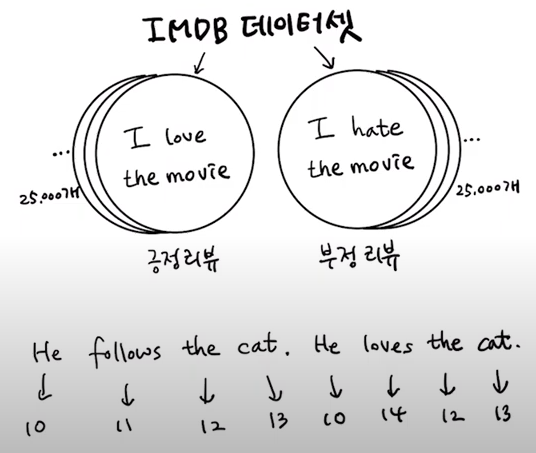

* 감성(감정)분석
* 말뭉치에 있는 토큰의 고유한 식별자로 어휘 사전 구성

In [6]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [7]:
train_input[:1]

array([list([1, 73, 89, 81, 25, 60, 2, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 2, 2, 66, 45, 6, 20, 15, 497, 8, 79, 17, 491, 8, 112, 6, 2, 20, 17, 2, 2, 4, 436, 20, 9, 2, 6, 2, 7, 493, 2, 6, 185, 250, 24, 55, 2, 5, 23, 350, 7, 15, 82, 24, 15, 2, 66, 10, 10, 45, 2, 15, 4, 20, 2, 8, 30, 17, 2, 5, 2, 17, 2, 190, 4, 20, 9, 43, 32, 99, 2, 18, 15, 8, 157, 46, 17, 2, 4, 2, 5, 2, 9, 32, 2, 5, 2, 267, 17, 73, 17, 2, 36, 26, 400, 43, 2, 83, 4, 2, 247, 74, 83, 4, 250, 2, 82, 4, 96, 4, 250, 2, 8, 32, 4, 2, 9, 184, 2, 13, 384, 48, 14, 16, 147, 2, 59, 62, 69, 2, 12, 46, 50, 9, 53, 2, 74, 2, 11, 14, 31, 151, 10, 10, 4, 20, 9, 2, 364, 352, 5, 45, 6, 2, 2, 33, 269, 8, 2, 142, 2, 5, 2, 17, 73, 17, 204, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 215, 69, 224, 142, 73, 237, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 451, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 470, 158])],
      

* 훈련셋: 25000
* 테스트셋: 25000

# LSTM과 GRU 셀

In [5]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## LSTM 신경망 훈련하기

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [9]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 0.6927 - accuracy: 0.5277 - val_loss: 0.6924 - val_accuracy: 0.5368
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6916 - accuracy: 0.5677 - val_loss: 0.6911 - val_accuracy: 0.5668
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6896 - accuracy: 0.6011 - val_loss: 0.6883 - val_accuracy: 0.6062
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6842 - accuracy: 0.6363 - val_loss: 0.6792 - val_accuracy: 0.6618
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6589 - accuracy: 0.6827 - val_loss: 0.6277 - val_accuracy: 0.7076
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6084 - accuracy: 0.7135 - val_loss: 0.5964 - val_accuracy: 0.7114
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5834 - accuracy: 0.7280 - val_loss: 0.5746 - val_accuracy:

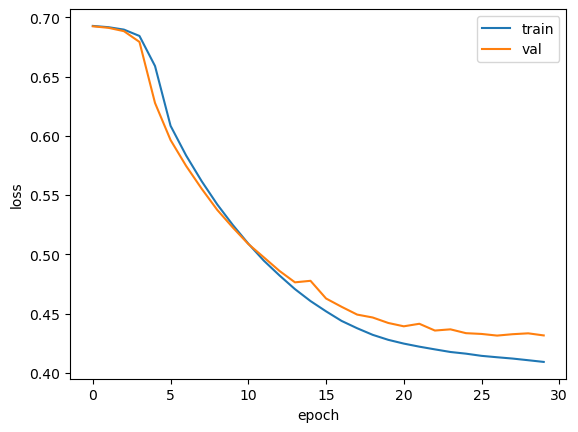

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [12]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 23ms/step - loss: 0.6924 - accuracy: 0.5317 - val_loss: 0.6917 - val_accuracy: 0.5696
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6907 - accuracy: 0.5788 - val_loss: 0.6897 - val_accuracy: 0.5984
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6879 - accuracy: 0.6057 - val_loss: 0.6861 - val_accuracy: 0.6232
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6826 - accuracy: 0.6251 - val_loss: 0.6787 - val_accuracy: 0.6392
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6674 - accuracy: 0.6511 - val_loss: 0.6529 - val_accuracy: 0.6630
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6258 - accuracy: 0.6999 - val_loss: 0.6108 - val_accuracy: 0.7108
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5967 - accuracy: 0.7250 - val_loss: 0.5894 - val_accuracy:

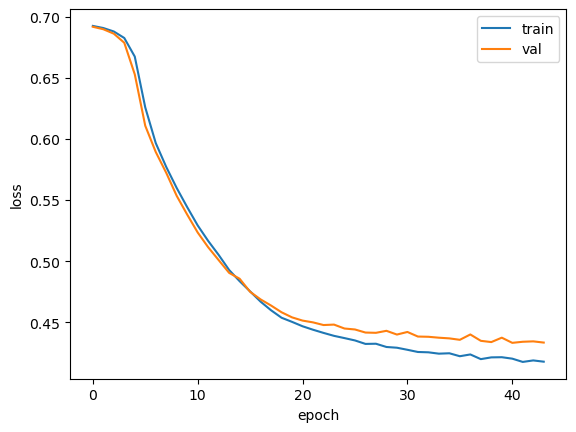

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [15]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6929 - accuracy: 0.5168 - val_loss: 0.6927 - val_accuracy: 0.5280
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6914 - accuracy: 0.5788 - val_loss: 0.6893 - val_accuracy: 0.6228
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6750 - accuracy: 0.6473 - val_loss: 0.6432 - val_accuracy: 0.6782
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6067 - accuracy: 0.6889 - val_loss: 0.5798 - val_accuracy: 0.7046
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5611 - accuracy: 0.7233 - val_loss: 0.5406 - val_accuracy: 0.7358
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5311 - accuracy: 0.7439 - val_loss: 0.5173 - val_accuracy: 0.7542
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5142 - accuracy: 0.7568 - val_loss: 0.5006 - val_ac

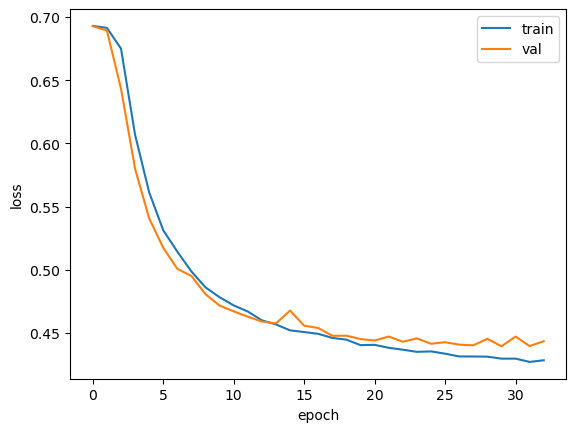

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [23]:
test_seq = pad_sequences(test_input, maxlen=100)
model3.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 8ms/step - loss: 0.4346 - accuracy: 0.7975


[0.434622585773468, 0.7974799871444702]

## GRU 신경망 훈련하기

In [19]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6920 - accuracy: 0.5486 - val_loss: 0.6912 - val_accuracy: 0.5724
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6898 - accuracy: 0.5790 - val_loss: 0.6889 - val_accuracy: 0.5830
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6865 - accuracy: 0.5975 - val_loss: 0.6852 - val_accuracy: 0.5958
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6813 - accuracy: 0.6107 - val_loss: 0.6792 - val_accuracy: 0.5994
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6732 - accuracy: 0.6204 - val_loss: 0.6701 - val_accuracy: 0.6134
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6608 - accuracy: 0.6387 - val_loss: 0.6556 - val_accuracy: 0.6302
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6404 - accuracy: 0.6581 - val_loss: 0.6304 - val_accuracy:

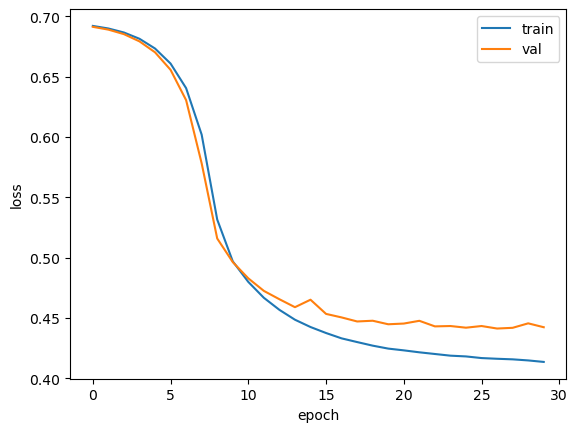

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [22]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 7ms/step - loss: 0.4346 - accuracy: 0.7975


[0.434622585773468, 0.7974799871444702]

In [ ]:
[0.434622585773468, 0.7974799871444702]

In [24]:
model4.evaluate(test_seq, test_target)

782/782 [==============================] - 3s 3ms/step - loss: 0.4376 - accuracy: 0.7973


[0.4376080334186554, 0.7973200082778931]